In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [9]:
path='C:\\Users\\ss\\Downloads\\2-Time Series Data Analysis\\individual_stocks_5yr'
company_list = ['AAPL_data.csv', 'GOOG_data.csv', 'MSFT_data.csv', 'AMZN_data.csv']

#blank dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(path+"/"+file)
    all_data = pd.concat([all_data, current_df])
    
all_data.shape

(4752, 7)

In [11]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
all_data['date'] = pd.to_datetime(all_data['date'])

In [18]:
all_data['date'][0]

0   2013-02-08
0   2014-03-27
0   2013-02-08
0   2013-02-08
Name: date, dtype: datetime64[ns]

In [20]:
all_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

# Analyse closing price of all the stocks

In [21]:
tech_list =  all_data['Name'].unique()

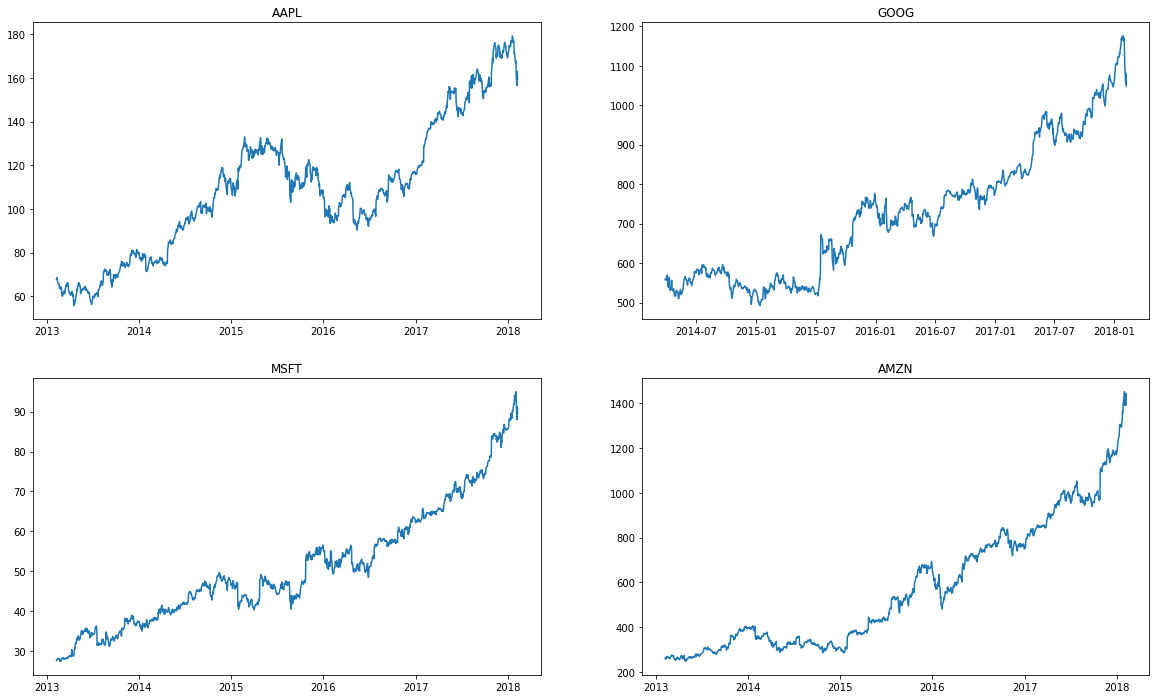

In [22]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)


# let's analyse the total valumen of stock being traded each day

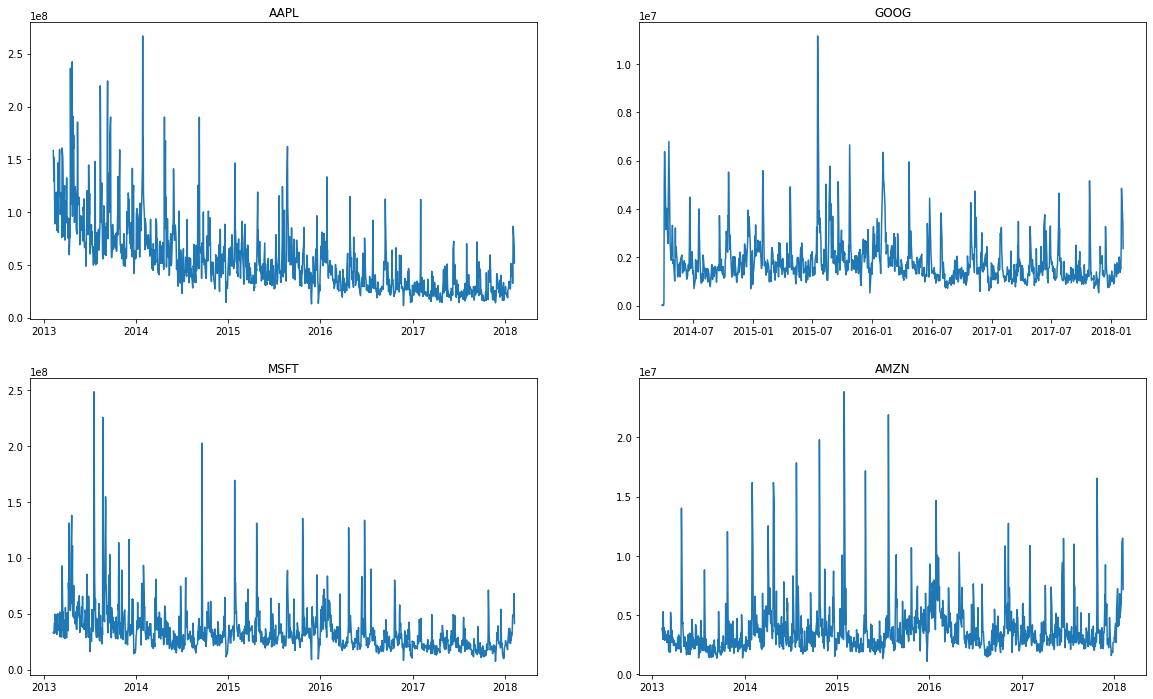

In [25]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['volume'])
    plt.title(company)


# Using plotly

In [27]:
import plotly.express as px 

In [30]:

for company in (tech_list):
    df=all_data[all_data['Name']==company]
    fig = px.line(df, x="date", y="volume", title=company)
    fig.show()

In [31]:
all_data['Name'].unique()

array(['AAPL', 'GOOG', 'MSFT', 'AMZN'], dtype=object)

# analyse Daily price change in stock

# Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [33]:
df=pd.read_csv('C:\\Users\\ss\Downloads\\2-Time Series Data Analysis\\individual_stocks_5yr\\AAL_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# percentage return

In [34]:
df['1day % return']=((df['close']-df['open'])/df['close'])*100
df.head()

,date,open,high,low,close,volume,Name,1day % return
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.169492
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.973721
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.261388
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.455662
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.790565


In [35]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day % return'],
      dtype='object')

using plotly to visualise data

In [39]:
import plotly.express as px
fig = px.line(df, x="date", y="1day % return", title='')
fig.show()

##### using matplotlib for visualisation

<AxesSubplot:>

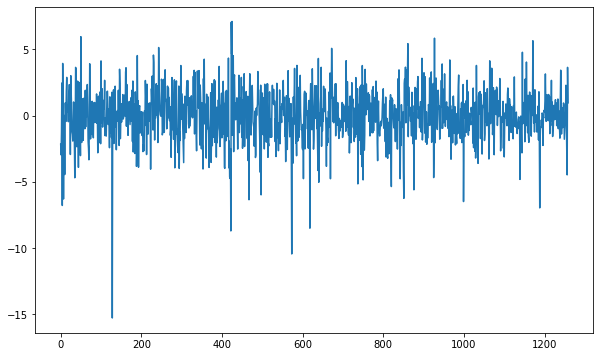

In [42]:
plt.figure(figsize=(10,6))
df['1day % return'].plot()

#### lets say between some interval

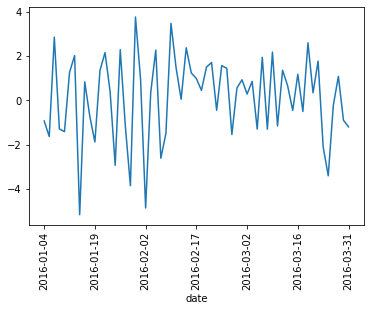

In [44]:
df.set_index('date')['2016-01-01':'2016-03-31']['1day % return'].plot()
plt.xticks(rotation='vertical')
plt.show()

Analyse monthly mean of close culumn

In [45]:
df2 = df.copy()

In [46]:
df2['date']=pd.to_datetime(df2['date'])

In [48]:
df2.set_index('date',inplace=True)

In [49]:
df2.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.169492
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.973721
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.261388
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.455662
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.790565


<AxesSubplot:xlabel='date'>

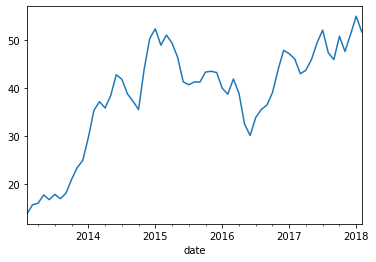

In [50]:
df2['close'].resample('M').mean().plot()

resampling close column year wise

<AxesSubplot:xlabel='date'>

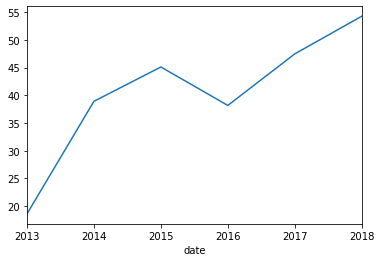

In [51]:
df2['close'].resample('Y').mean().plot()

##### Checking if the Stock prices of these tech companies(Amazon,Apple,Google,Microsoft) are correlated

In [52]:
df2.head()

,open,high,low,close,volume,Name,1day % return
date,,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,-2.169492
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-2.973721
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-1.261388
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,2.455662
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-6.790565


reading data of tech companies

In [54]:
aapl=pd.read_csv('C:\\Users\\ss\Downloads\\2-Time Series Data Analysis\\individual_stocks_5yr\\AAL_data.csv')
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [55]:
goog=pd.read_csv('C:\\Users\\ss\Downloads\\2-Time Series Data Analysis\\individual_stocks_5yr\\GOOG_data.csv')
goog.head()

,date,open,high,low,close,volume,Name
0,2014-03-27,568.000,568.00,552.92,558.46,13052,GOOG
1,2014-03-28,561.200,566.43,558.67,559.99,41003,GOOG
2,2014-03-31,566.890,567.00,556.93,556.97,10772,GOOG
3,2014-04-01,558.710,568.45,558.71,567.16,7932,GOOG
4,2014-04-02,565.106,604.83,562.19,567.00,146697,GOOG


In [56]:
amzn=pd.read_csv('C:\\Users\\ss\Downloads\\2-Time Series Data Analysis\\individual_stocks_5yr\\AMZN_data.csv')
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [57]:
msft=pd.read_csv('C:\\Users\\ss\Downloads\\2-Time Series Data Analysis\\individual_stocks_5yr\\MSFT_data.csv')
msft.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [58]:
### create a blank dataframe
close=pd.DataFrame()

In [59]:
close['aapl']=aapl['close']
close['goog']=goog['close']
close['amzn']=amzn['close']
close['msft']=msft['close']

In [60]:
close.head()

,aapl,goog,amzn,msft
0,14.75,558.46,261.95,27.55
1,14.46,559.99,257.21,27.86
2,14.27,556.97,258.70,27.88
3,14.66,567.16,269.47,28.03
4,13.99,567.00,269.24,28.04


Multi-variate Analysis¶

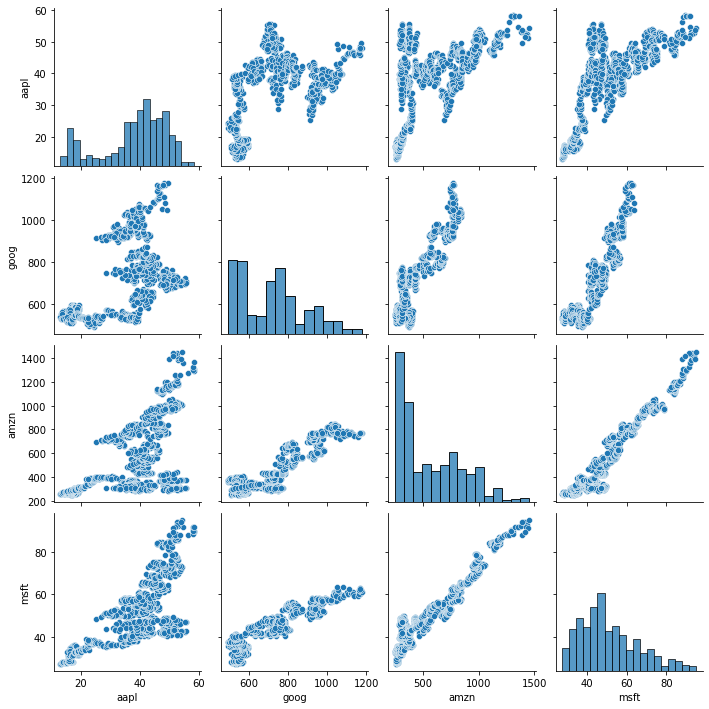

In [61]:
sns.pairplot(data=close)

co-relation plot for stock prices  

<AxesSubplot:>

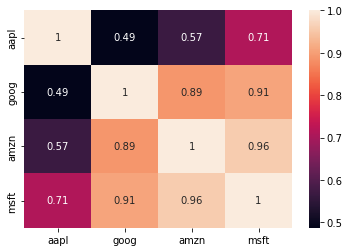

In [62]:
sns.heatmap(close.corr(),annot=True)

###### Closing price of Google and Microsoft are well correlated
       and Closing price of Amazon and Microsoft have a co-relation of 0.96

##### Analyse Daily return of each stock & how they are co-related

In [63]:
data=pd.DataFrame()

In [64]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [65]:
data['appl_change']=((aapl['close']-aapl['open'])/aapl['close'])*100
data['goog_change']=((goog['close']-goog['open'])/goog['close'])*100
data['amzn_change']=((amzn['close']-amzn['open'])/amzn['close'])*100
data['msft_change']=((msft['close']-msft['open'])/msft['close'])*100

In [66]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,-2.169492,-1.708269,0.209964,0.725953
1,-2.973721,-0.216075,-2.328836,0.753769
2,-1.261388,-1.781065,-0.189409,0.000000
3,2.455662,1.489879,2.946525,0.356761
4,-6.790565,0.334039,0.694548,0.427960


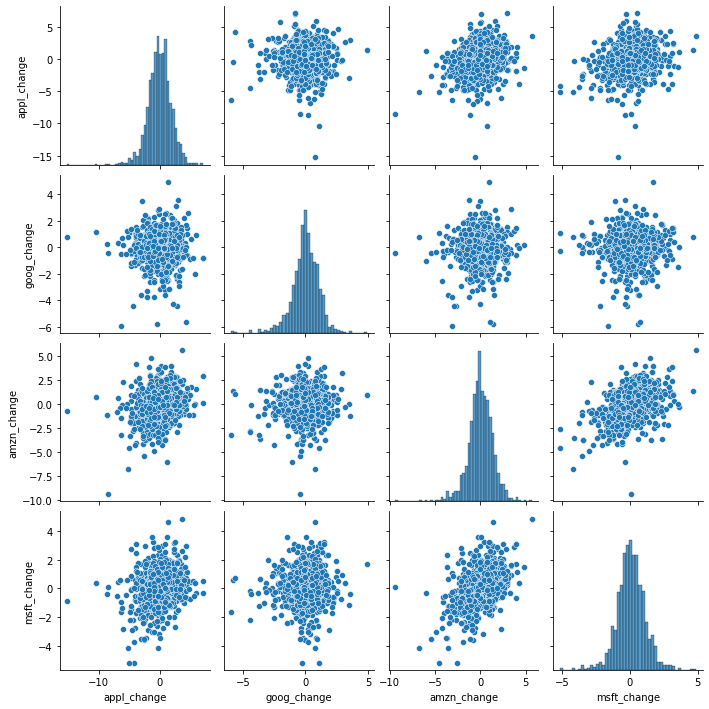

In [67]:
sns.pairplot(data=data)

##### Correlation plot for daily returns

<AxesSubplot:>

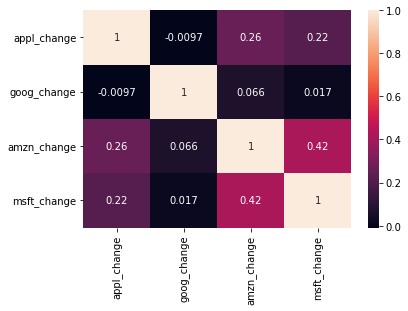

In [68]:
sns.heatmap(data.corr(),annot=True)

We can see that Amazon and microsoft have good correlation on daily returns

In [69]:
data.head()

,appl_change,goog_change,amzn_change,msft_change
0,-2.169492,-1.708269,0.209964,0.725953
1,-2.973721,-0.216075,-2.328836,0.753769
2,-1.261388,-1.781065,-0.189409,0.000000
3,2.455662,1.489879,2.946525,0.356761
4,-6.790565,0.334039,0.694548,0.427960


In [70]:
data.columns

Index(['appl_change', 'goog_change', 'amzn_change', 'msft_change'], dtype='object')

In [71]:
type(data)

pandas.core.frame.DataFrame

#### Value at Risk analysis for Apple

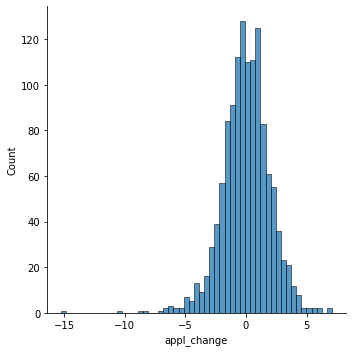

In [72]:
sns.displot(data['appl_change'])

##### it somehow follows a normal distribution

In [73]:
data['appl_change'].std()

1.9790475653201263

In [75]:
data['appl_change'].quantile(0.1)

-2.2603878400262327

##### 2.2603878400262327 means that 90% of the times the worst daily Loss will not exceed 2.26

In [78]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
appl_change,1259.0,-0.007561,1.979048,-15.281174,-1.164317,0.000000,1.154953,7.097361
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
msft_change,1259.0,0.076404,1.059260,-5.177618,-0.509241,0.061069,0.703264,4.861491
